<a href="https://colab.research.google.com/github/acmhp/MQTT_Temp_Umidade/blob/master/Lista6_AnaCarmenMSSantana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1.0, 8.0, 28.0, 56.0, 70.0, 56.0, 28.0, 8.0, 1.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
[0.003163965138861484, 0.02666306556445078, 0.09830294501226156, 0.20710230304431287, 0.2726988743884305, 0.22980619722589704, 0.12103755562308541, 0.03642843416523486, 0.004796659837465474]
169.84164865408445
1431.273359499718
5276.9020882582
11117.251627418715
14638.475577170948
12335.996667086154
6497.295985847225
1955.4783459898074
257.48470007514663
[0.         0.00631803 0.03065662 0.06275536 0.09022352 0.10688151
 0.1120209  0.10789273 0.09768341 0.08435894 0.07018695]
0.0


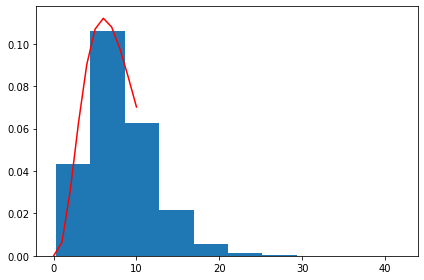

In [35]:
#Questão 10

from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
import math
from scipy import stats

k=np.linspace(0,53680,53681)
p1 = 0.513
n1 = 8

n1_k = []
k1 = []
f_kn1p1 = []

i=0
while(n1 >= k[i]):
    k1.append(k[i])
    n1_k.append(factorial(n1)/(factorial(k[i])*factorial(n1-k[i])))
    f_kn1p1.append(n1_k[i]*(p1**k[i])*((1-p1)**(n1-k[i])))
    i = i+1
    
print(n1_k)
print(k1)
print(f_kn1p1)

i=0
while(n1 >= i):
    EX = 53680 * f_kn1p1[i]
    print(EX)
    i = i+1

k = 8
size = 53680
s = np.random.chisquare(k,size)


bins=10
plt.hist(s, bins, density=True)
bin = np.linspace(0,bins,bins+1)
y = ((bin**(k/2-1.0))*np.exp(-bin/2.0))/((2.0**(k/2.0))*math.gamma(k/2))
print(y)
plt.plot(bin,y,color='red')
plt.tight_layout()

p_valor = stats.chi2.cdf(y[0],1)
print(p_valor)

In [38]:
#Exercico 19

import code
import theano.tensor as tt
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

data = np.array( [1, 2, 27, 802, 2087, 18901, 14343, 21531] )

N = len( data )

print( "Number of data points: %d" % N )
def build_model():
    with pm.Model() as model:
        # unsure about the prior...
        #s = pm.Normal( 's', mu=0.0, sd=100 )
        #s = pm.HalfNormal( 's', sd=10 )

      s = pm.Gamma('s', alpha=1, beta=8)


      def logp( f ):
        r = tt.arange( 1, N+1 )
        return -s * tt.sum( f * tt.log(r) ) - tt.sum( f ) * tt.log( tt.sum(tt.power(1.0/r,s)) )

      pm.DensityDist( 'obs', logp=logp, observed={'f': data} )


      return model

def run( n_samples=10000 ):
    model = build_model()
    with model:
        start = pm.find_MAP()

if __name__ == '__main__':
    run()

Number of data points: 8
